
Challenge: Análisis de tickets AIUT
¡Hola científica/científico de datos! Aquí tienes el challenge.

Planteamiento del problema: Tu que trabajas en AIUT. Te han asignado a la división de análisis de datos de tickets.

El trabajo de esta división es crucial, una de sus labores principales es recopilar los datos necesarios para implementar un sistema de analisis de tickets.

El equipo que implementará el modelo necesita que generemos el código para realizar 3 tareas de consulta. Prepara el código para que puedan realizar esas tareas:


1.   Obtener el comentario más solicitado
2.   Cuales son las horas más solicitadas para instalaciones
3.   Cuál es el tiempo que más ha durado un ticket








In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
aiutdf=pd.read_csv("aiutofficer(1).csv")

In [34]:
df_2 = aiutdf["KOMENTARZ"].str.split(" - ", expand = True)
df_2.columns = ["ID", "SERVICE-NAME","OTHER","OTHER2","OTHER3"]

In [35]:
aiutdf = pd.concat([aiutdf,df_2], axis = 1)


In [36]:
aiutdf=aiutdf.drop(["KOMENTARZ"], axis=1)


#1. Obtener el comentario (SERVICE-NAME) más solicitado

In [37]:
#1. Obtener el comentario (SERVICE-NAME) más solicitado
df_ticket = aiutdf.groupby(by = ['SERVICE-NAME']).count().reset_index() 
df_ticket = pd.DataFrame(df_ticket,columns = ['SERVICE-NAME','DATA'])
df_ticket = df_ticket.sort_values(by='DATA',ascending=False)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


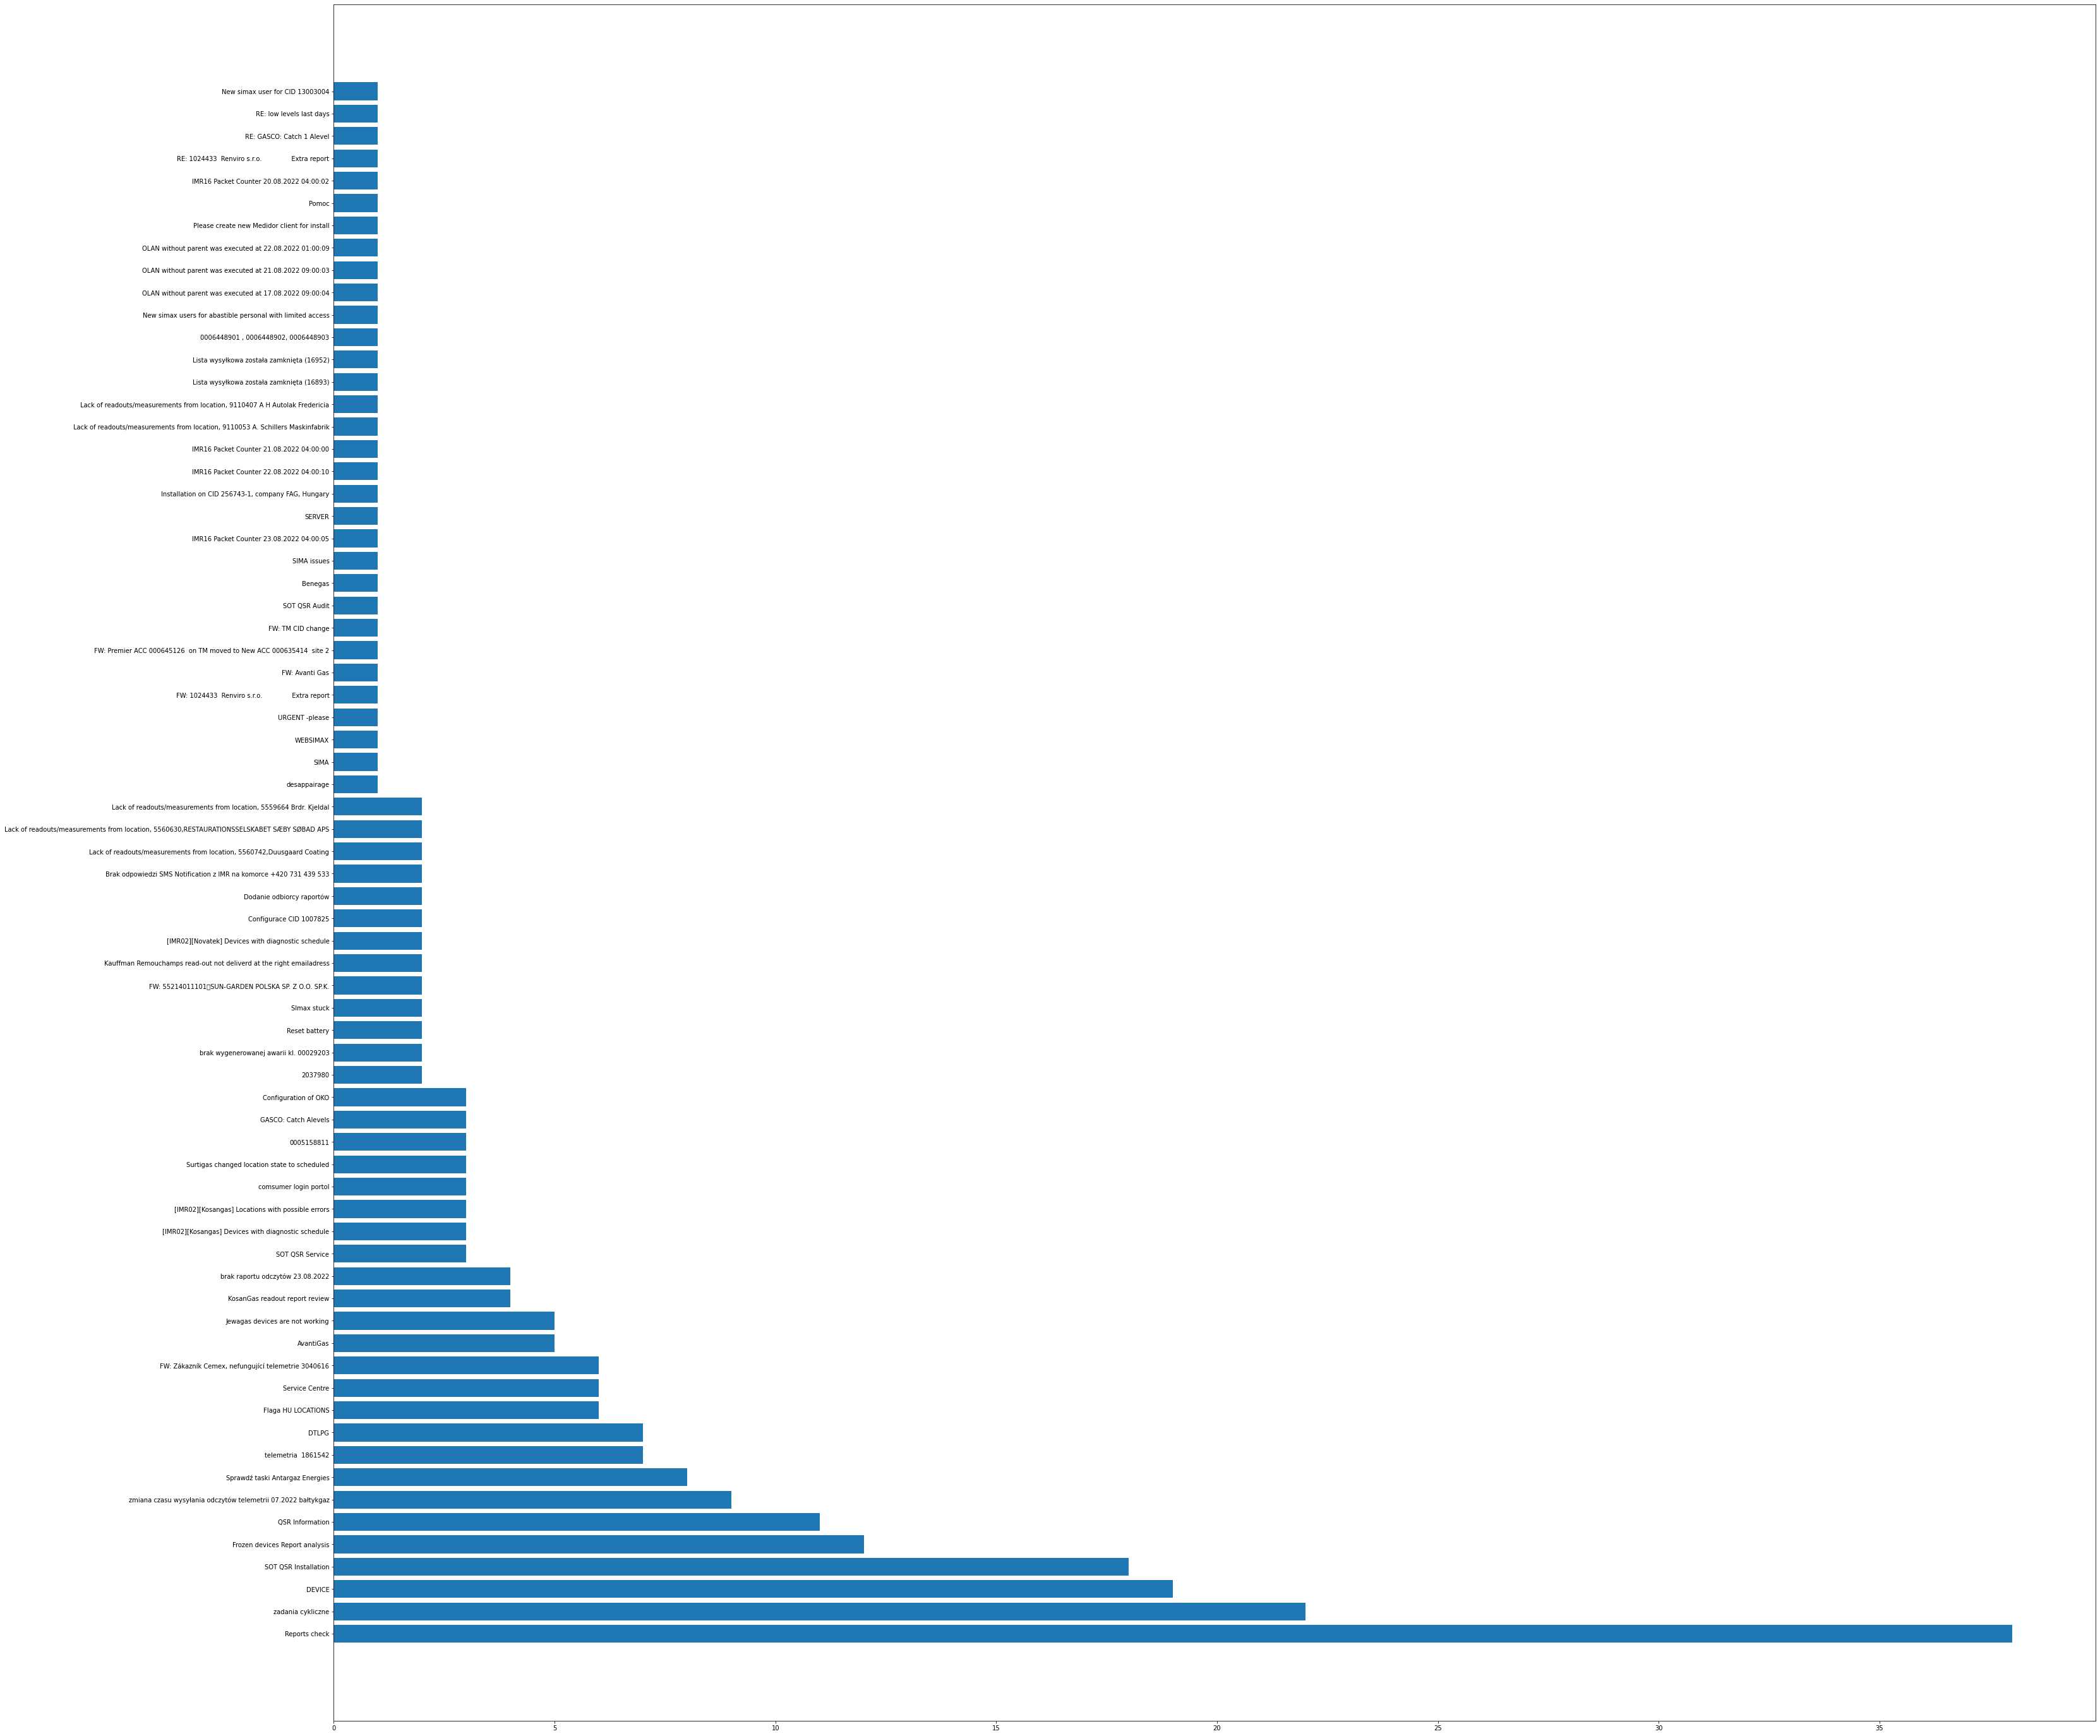

In [38]:
plt.figure(figsize=(50,50))
plt.barh(df_ticket['SERVICE-NAME'],df_ticket['DATA'])
plt.show()

#2.   Cuales son las horas más solicitadas para instalaciones


In [39]:
# df_hour = aiutdf.groupby(by = ['OD']).count().reset_index() 
df_hour=aiutdf

In [40]:
df_hour2=df_hour['OD'].str.split(':',expand = True)
df_hour2.columns = ['HOUR','MINUTES']
df_hour2

,HOUR,MINUTES
0,08,00
1,08,40
2,10,43
3,11,33
4,11,42
...,...,...
264,08,24
265,08,48
266,09,01
267,09,02


In [41]:
df_hour = pd.concat([df_hour,df_hour2], axis = 1)
df_hour=df_hour.drop(["OD"], axis=1)

In [42]:
df_hour=df_hour.groupby(by = ['HOUR']).count().reset_index() 

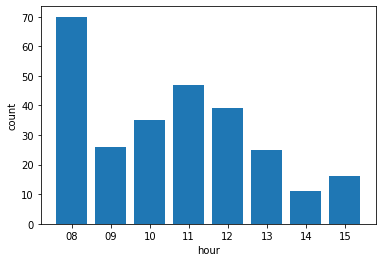

In [43]:
plt.bar(df_hour['HOUR'],df_hour['DATA'])
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

#3.   Cuál es el tiempo que más ha durado un ticket

In [44]:
# timedf=aiutdf.groupby(by=aiutdf['CZAS']).count().reset_index() 
timedf=aiutdf
#timedf.sort_values('CZAS',ascending=False)